<a href="https://colab.research.google.com/github/kiraneranki/Autism-Spectral-Disorder/blob/main/predicting_early_asd_traits_of_toddlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Based on Quantitative Checklist for Autism in Toddlers (Q-CHAT) data provided by *ASD Tests* app I shall try to develop a simple prediction model for toddlers to predict probability of showing ASD traits so that their parents/guardians can consider taking steps early.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("sample_data/input"))

# Any results you write to the current directory are saved as output.

['Autism_Data.arff', 'Toddler Autism dataset July 2018.csv', 'Toddler data description.docx']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**We shall also explore ASD data for adults provided by ASD Tests app and gain some insights for that.**

In [ ]:
df1 = pd.read_csv('sample_data/input/Autism_Data.arff',na_values='?')
df2 = pd.read_csv('sample_data/input/Toddler Autism dataset July 2018.csv',na_values='?')

In [ ]:
df1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


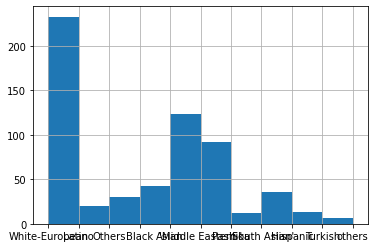

In [134]:

ethnicity = df1['ethnicity'].astype('category')
ethnicity.hist()

#jundice = df1['jundice'].astype('category')
#jundice.hist()




In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
df2.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

**EDA**

In [ ]:
sns.set_style('whitegrid')
data1= df1[df1['Class/ASD']=='YES']
data2= df2[df2['Class/ASD Traits ']=='Yes']
print("Adults: ",len(data1)/len(df1) * 100)
print("Toddlers:",len(data2)/len(df2) * 100)

Adults:  26.84659090909091
Toddlers: 69.07020872865274


**Around 1% of the population has ASD, but for this sample we get around 27%  for Adults and 69% for Toddlers of the data with positive ASD. It's so because the test parameters features only qualitative properties of ASDs**

Text(0.5, 1.0, 'Toddlers dataset')

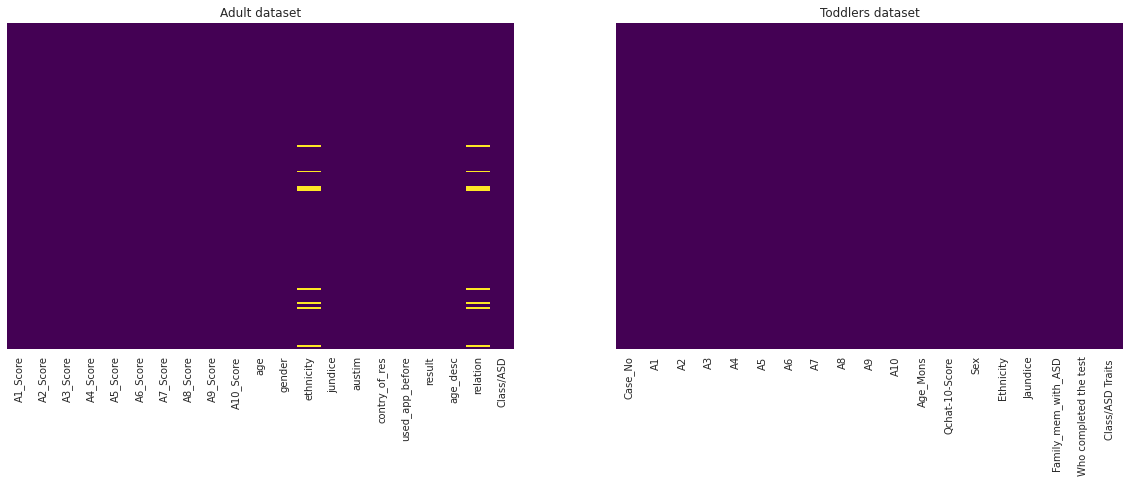

In [ ]:
#Let's visualize the missing data
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[0])
ax[0].set_title('Adult dataset')
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[1])
ax[1].set_title('Toddlers dataset')

Text(0.5, 0, 'Jaundice while birth')

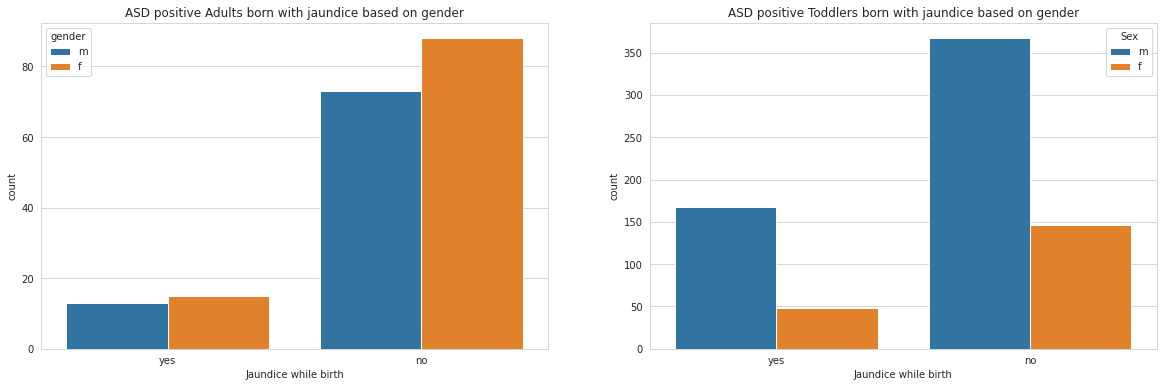

In [ ]:
#Let's visualize the jaundice born child based on gender
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='jundice',data=data1,hue='gender',ax=ax[0])
ax[0].set_title('ASD positive Adults born with jaundice based on gender')
ax[0].set_xlabel('Jaundice while birth')
sns.countplot(x='Jaundice',data=data2,hue='Sex',ax=ax[1])
ax[1].set_title('ASD positive Toddlers born with jaundice based on gender')
ax[1].set_xlabel('Jaundice while birth')

We can see here almost 6-7 times more (in Adults) and 2-3 times more (in Toddlers) of non-jaundice born ASD positive whereas according to reports that is around 10 times. **Jaundice born child have a weak link with ASD.**

Also, **according to reports, ASD is more common among boys (around 4-5 times) than among girls.** But here in Adults we see a lower ratio, whereas in Toddlers its nearly 4 times boys than girls, which is quite close to actual ratio. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution of ASD positive')

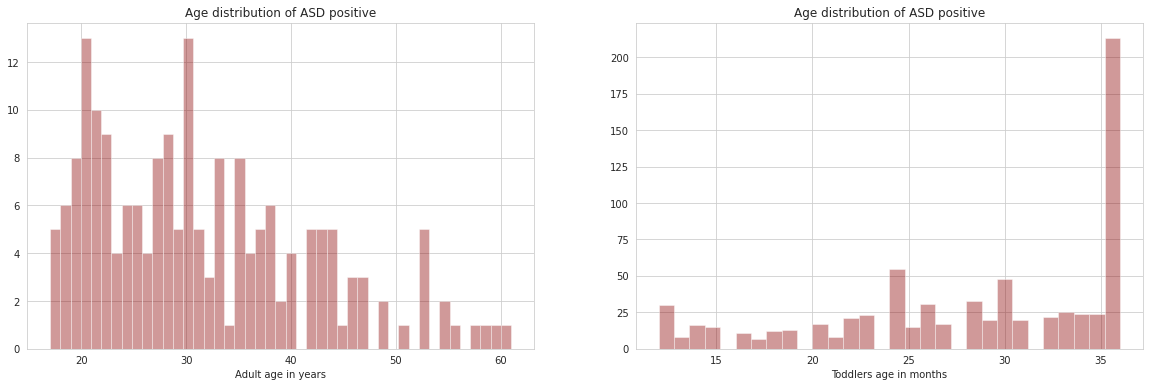

In [ ]:
#Let's see the age distribution of ASD positive
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(data1['age'],kde=False,bins=45,color='darkred',ax=ax[0])
ax[0].set_xlabel('Adult age in years')
ax[0].set_title('Age distribution of ASD positive')
sns.distplot(data2['Age_Mons'],kde=False,bins=30,color='darkred',ax=ax[1])
ax[1].set_xlabel('Toddlers age in months')
ax[1].set_title('Age distribution of ASD positive')

So for adults most of the ASD positive are around 20 or 30 years of age, whereas for toddlers most of them are around 36months. We can see in adults as the age increases the number decreases, whereas in toddlers as the age increases the number increases. It goes well with the research. **For adults, people with autism develop strategies to help them age better. For toddlers, the significant signs of autism reveals around 3 years of age.**

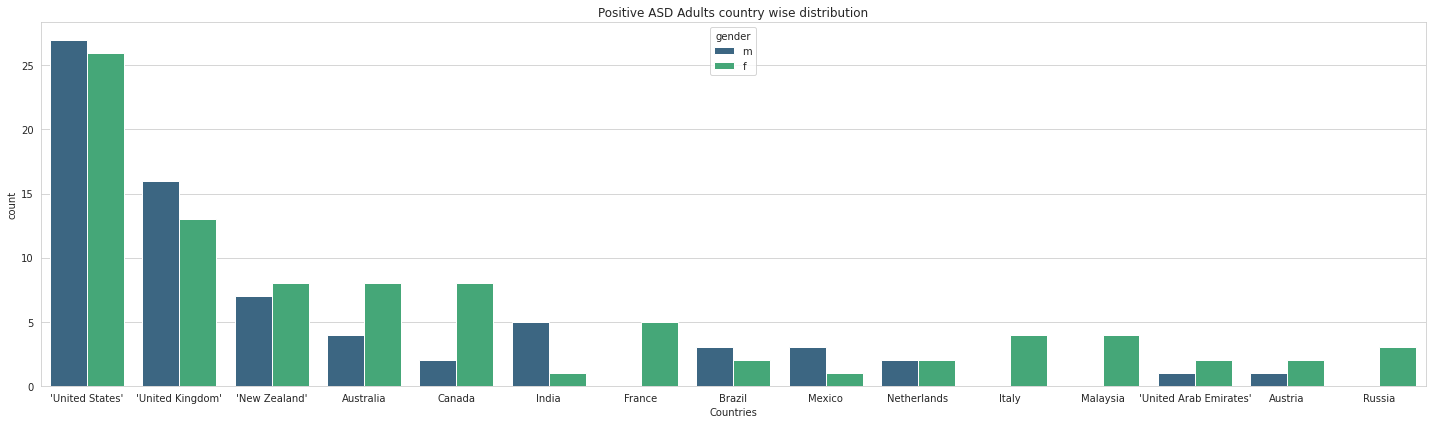

In [ ]:
# Let's visualize positive ASD positive Adults based on top 15 countries
plt.figure(figsize=(20,6))
sns.countplot(x='contry_of_res',data=data1,order= data1['contry_of_res'].value_counts().index[:15],hue='gender',palette='viridis')
plt.title('Positive ASD Adults country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

Even though the reach of the app affects this distribution, it does quite well describing the report. **Developed countries like UK,US, Australia,Canada indeed are the most affected ones.** But we see female population distinguishable compared to males, which is quite contrary.

In [ ]:
#Lets see the ethnicity value counts
print(data1['ethnicity'].value_counts())
data2['Ethnicity'].value_counts()

White-European       109
Black                 18
Asian                 16
Latino                10
Others                 9
'Middle Eastern '      8
Hispanic               5
'South Asian'          3
Pasifika               1
Turkish                1
Name: ethnicity, dtype: int64


White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

In the sample, **White and European ethnicities data overshadows the rest.** Which is quite close to studies done.

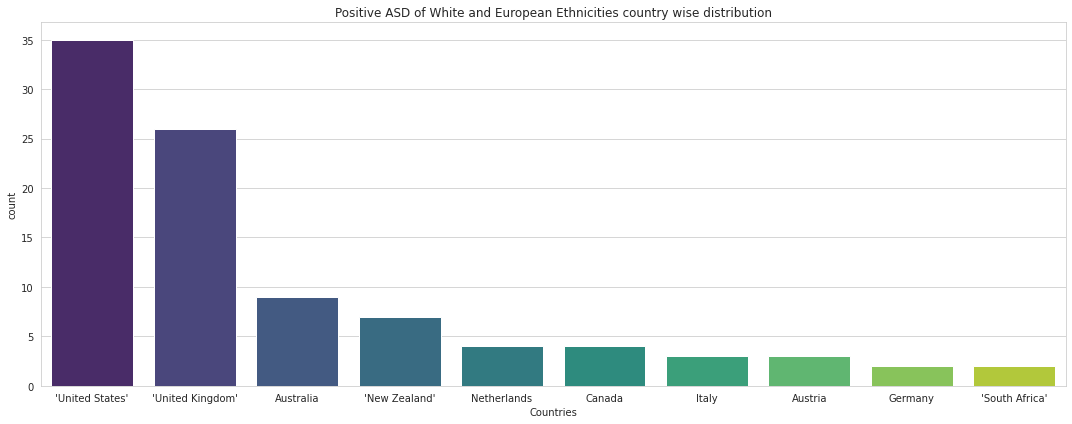

In [ ]:
#Lets visualize the ASD distribution of Adult White and European ethnicity based on country
#We are considering both country and ethnicity because the reports suggests so.
plt.figure(figsize=(15,6))
sns.countplot(x='contry_of_res',data=data1[data1['ethnicity']=='White-European'],order=data1[data1['ethnicity']=='White-European']['contry_of_res'].value_counts().index[:10],palette='viridis')
plt.title('Positive ASD of White and European Ethnicities country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

If we plot for other ethnicities in same country we shall get very low data plots. 

We can see that above graph compared to countrywise distribution looks very same for top 5 countries **US, UK, Australia, NZ and Canada thus affirming their positions as top contributors of Positive ASD.**

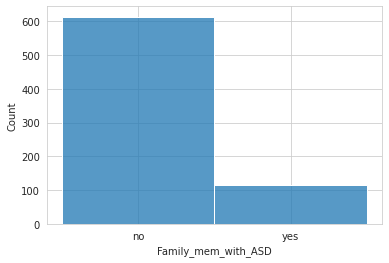

In [ ]:
sns.histplot(data=data2, x='Family_mem_with_ASD')

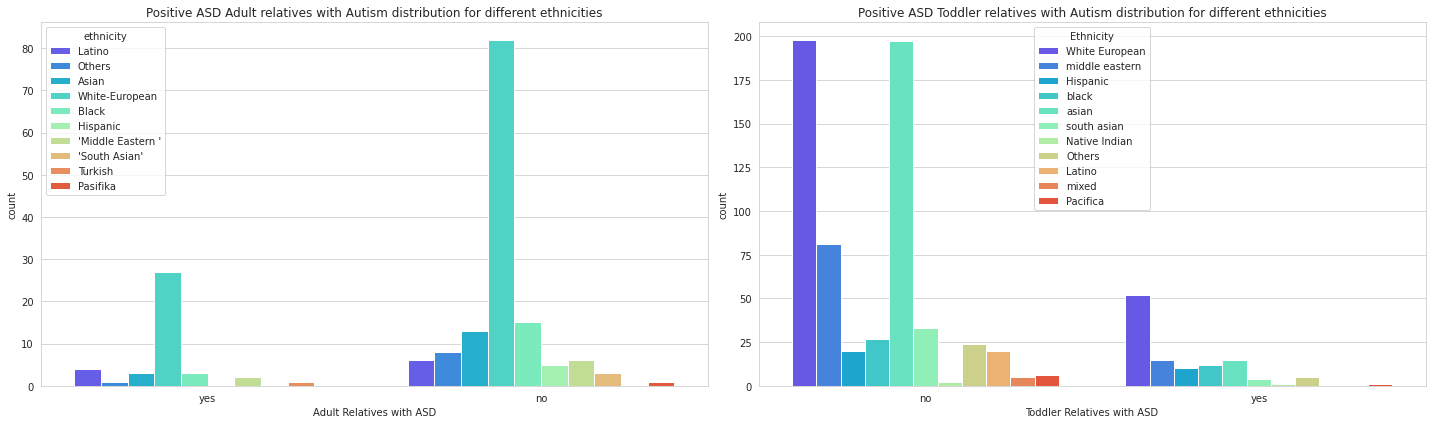

In [ ]:
#Lets visualize the distribution of autism in family within different ethnicity
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='austim',data=data1,hue='ethnicity',palette='rainbow',ax=ax[0])
ax[0].set_title('Positive ASD Adult relatives with Autism distribution for different ethnicities')
ax[0].set_xlabel('Adult Relatives with ASD')
sns.countplot(x='Family_mem_with_ASD',data=data2,hue='Ethnicity',palette='rainbow',ax=ax[1])
ax[1].set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
ax[1].set_xlabel('Toddler Relatives with ASD')
plt.tight_layout()

We can observe that both in Adults and Toddlers, **White and Europeans Ethnicities have very high chance of being ASD positive if they have it in their genes**. Black and Asians follow the next though with smaller ratios. We can not conclude anything firmly, but **we can stay confident that there is a genetic link for ASD positive** as backed by studies.

*Rest of the parameters are irrelevant for our study on ASD positive.*

**We shall build three models using Logistic Regression,Random Forrest Classifier and K-NN Classifier on Toddlers Data.**

**FEATURE ENGINEERING**

In [ ]:
within24_36= pd.get_dummies(df2['Age_Mons']>24,drop_first=True)
within0_12 = pd.get_dummies(df2['Age_Mons']<13,drop_first=True)
male=pd.get_dummies(df2['Sex'],drop_first=True)
ethnics=pd.get_dummies(df2['Ethnicity'],drop_first=True)
jaundice=pd.get_dummies(df2['Jaundice'],drop_first=True)
ASD_genes=pd.get_dummies(df2['Family_mem_with_ASD'],drop_first=True)
ASD_traits=pd.get_dummies(df2['Class/ASD Traits '],drop_first=True)

In [ ]:
final_data= pd.concat([within0_12,within24_36,male,ethnics,jaundice,ASD_genes,ASD_traits],axis=1)
final_data.columns=['within0_12','within24_36','male','Latino','Native Indian','Others','Pacifica','White European','asian','black','middle eastern','mixed','south asian','jaundice','ASD_genes','ASD_traits']
final_data.head()

,within0_12,within24_36,male,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian,jaundice,ASD_genes,ASD_traits
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1


**MODEL BUILDING:**

In [ ]:
from sklearn.model_selection import train_test_split
X= final_data.iloc[:,:-1]
y= final_data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

For better parameters we will apply GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1,10,100,1000]}

In [ ]:
grid_log = GridSearchCV(LogisticRegression(),param_grid,refit=True)

In [ ]:
grid_log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_log.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_log=grid_log.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

[[  0  78]
 [  0 133]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.63      1.00      0.77       133

    accuracy                           0.63       211
   macro avg       0.32      0.50      0.39       211
weighted avg       0.40      0.63      0.49       211



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2. Random Forrest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rfc= rfc.predict(X_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[ 25  53]
 [ 10 123]]
              precision    recall  f1-score   support

           0       0.71      0.32      0.44        78
           1       0.70      0.92      0.80       133

    accuracy                           0.70       211
   macro avg       0.71      0.62      0.62       211
weighted avg       0.70      0.70      0.67       211



**3. KNN Classifier**

In [ ]:
#first scale the variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
scaler.fit(X)
scaled_features = scaler.transform(X)

In [ ]:
X_scaled = pd.DataFrame(scaled_features,columns=X.columns)
X_scaled.head()

,within0_12,within24_36,male,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian,jaundice,ASD_genes
0,-0.260543,0.714163,-1.517918,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,2.146249,-0.087454,-0.245687,1.630865,-0.438529
1,-0.260543,0.714163,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,1.468226,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,1.630865,-0.438529
2,-0.260543,0.714163,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,2.146249,-0.087454,-0.245687,1.630865,-0.438529
3,-0.260543,-1.400241,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,-0.613171,-0.438529
4,-0.260543,-1.400241,-1.517918,-0.159034,-0.053427,-0.185331,-0.087454,1.468226,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,-0.613171,2.280351


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=101)

Let's choose a k-value using elbow method

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]

for i in range (1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

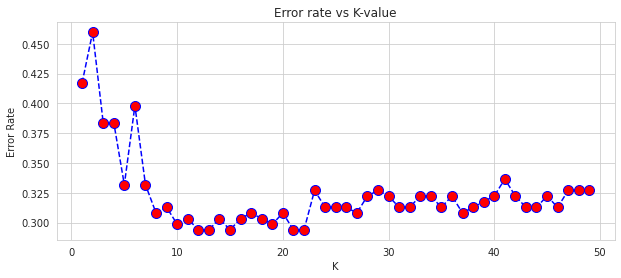

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We choose k=13

In [ ]:
knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
pred_knn=knn.predict(X_test)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

[[ 27  51]
 [ 11 122]]
              precision    recall  f1-score   support

           0       0.71      0.35      0.47        78
           1       0.71      0.92      0.80       133

    accuracy                           0.71       211
   macro avg       0.71      0.63      0.63       211
weighted avg       0.71      0.71      0.67       211



**Out of above three models KNN classifer and Random Forrest Classifier performs same overall but much better than Logistic Regression**

**So based on the KNN classifier model on above dataset, if any parent provides toddler's age,gender,ethnicity,jaundice while birth? and any relative having ASD traits?, the model can predict either the toddler has ASD or not with precision of 71%**

**4. Support Vector Machine Analysis**

In [ ]:
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [ ]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Train set",y_train.shape)
print("Dimension of Test set",y_test.shape,"\n")



Dimension of Train set (843, 15)
Dimension of Train set (843,)
Dimension of Test set (211,) 



In [ ]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train)
print(X_train_scaled)
print(y_test)

#Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled,y_train)

     within0_12  within24_36      male  ...  south asian  jaundice  ASD_genes
533   -0.260543    -1.400241  0.658797  ...    -0.245687  1.630865  -0.438529
531    3.838143    -1.400241 -1.517918  ...    -0.245687 -0.613171  -0.438529
669   -0.260543    -1.400241  0.658797  ...    -0.245687 -0.613171  -0.438529
323   -0.260543     0.714163  0.658797  ...    -0.245687  1.630865  -0.438529
633   -0.260543    -1.400241  0.658797  ...    -0.245687  1.630865  -0.438529
..          ...          ...       ...  ...          ...       ...        ...
575   -0.260543     0.714163  0.658797  ...    -0.245687  1.630865  -0.438529
973   -0.260543     0.714163  0.658797  ...    -0.245687  1.630865   2.280351
75    -0.260543    -1.400241  0.658797  ...    -0.245687 -0.613171  -0.438529
599   -0.260543     0.714163  0.658797  ...    -0.245687 -0.613171  -0.438529
863   -0.260543     0.714163 -1.517918  ...    -0.245687  1.630865  -0.438529

[843 rows x 15 columns]
[[-0.24299223 -1.40669776  0.65114245 .

In [ ]:
# View the accuracy score
#print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
#print('Best C:',svm_model.best_estimator_.C,"\n") 
#print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
#print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

AttributeError: ignored